# Сравнение предложений. Косинусное расстояние

    



        
        




    
    
    
    


In [9]:
import numpy as np
import scipy
from scipy.spatial import distance
import re

file_obj = open('sentences.txt')

#print file_obj.read()

data_obj = file_obj.readlines()

n = 0

for sentense in data_obj:
   n += 1

a = []

for sentence in data_obj:
    sentence = sentence.lower().strip()
    a.append(sentence)
    
a = ' '.join(a)

a = re.split('[^a-z]', a)

a = [word for word in a if word]
a = set(a)
a = list(a)

d ={}

for i in xrange(len(a)):
    d.update({a[i]:i})

    
matrix = np.zeros((n, len(a)))


for i in range(n):
    sentence = data_obj[i].lower().strip()
    words = re.split('[^a-z]', sentence)
    words = [word for word in words if word]
    for j in range(len(words)):
            matrix[i][d[words[j]]] += 1
            
results = []
            
for i in range(n):
    results.append(scipy.spatial.distance.cosine(matrix[0,:], matrix[i,:]))
    
print(results)

#string = '6 4'
#file_obj = open('submission-1.txt', 'w')
#file_obj.write(string)
#file_obj.close()



[0.0, 0.95275444087384664, 0.86447381456421235, 0.89517151632780823, 0.77708871496985887, 0.94023856953328033, 0.7327387580875756, 0.92587506833388988, 0.88427248752843102, 0.90550888174769317, 0.83281653622739416, 0.88047713906656067, 0.83964325485254543, 0.87035925528956715, 0.87401184233025764, 0.94427217874246472, 0.84063618542208085, 0.95664450152379399, 0.94427217874246472, 0.88854435748492944, 0.84275727449171223, 0.82503644694405864]


# Апроксимация функции 
## Линейное приближение

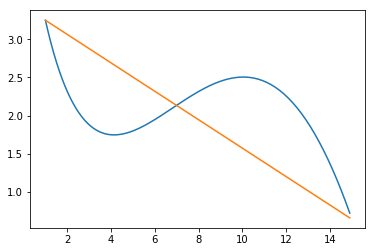

In [7]:
from scipy import sin, exp, linalg
from matplotlib import pylab as plt
import numpy as np

%matplotlib inline

def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

b = np.array([f(1.), f(15.)])
matrix = np.array([[1, 1], [1, 15]])

w = scipy.linalg.solve(matrix, b)

x = np.arange(1, 15, 0.1)
plt.plot(x,f(x))
multinomial = w[0] + w[1] * x
plt.plot(x, multinomial)
plt.show()




## Квадратичное приближение

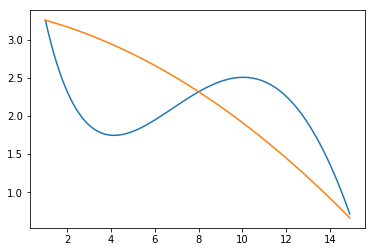

In [95]:
from scipy import sin, exp, linalg
from matplotlib import pylab as plt
import numpy as np

%matplotlib inline

def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

b = np.array([f(1.), f(8.), f(15.)])
matrix = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])

w = scipy.linalg.solve(matrix, b)

x = np.arange(1, 15, 0.1)
plt.plot(x,f(x))
multinomial = w[0] + w[1] * x + w[2] * (x ** 2)
plt.plot(x, multinomial)
plt.show()

## Кубическое приближение

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


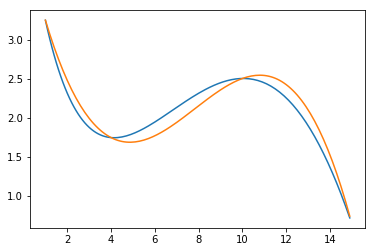

In [8]:
from scipy import sin, exp, linalg
from matplotlib import pylab as plt
import numpy as np

%matplotlib inline

def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

def cube(x):
    return x ** 3

b = np.array([f(1.), f(4.), f(10.), f(15.)])

matrix = np.array([[1, 1, 1, 1], [1, 4, 16, cube(4) ], [1, 10, 100, cube(10)], [1, 15, 225, cube(15)]])

W = scipy.linalg.solve(matrix, b)

print(W)

results = []

for i in range(len(W)):
    results.append(str(W[i]))
    

string = ' '.join(results)

file_obj = open('submission-2.txt', 'w')
file_obj.write(string)
file_obj.close()

x = np.arange(1, 15, 0.1)
plt.plot(x,f(x))
multinomial = W[0] + (W[1] * (x)) + (W[2] * (x ** 2)) + (W[3] * (x ** 3))
plt.plot(x, multinomial)
plt.show()

# Оптимизация
## Минимизация гладкой функции

In [58]:
from scipy import math, optimize 

def f(x):
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

result = scipy.optimize.minimize (f, 2, method = 'BFGS')  # у функции три лок минимума, ответ меняется в зависимости от нач приближения
print(round(result.fun, 2))
result1 = scipy.optimize.minimize (f, 30, method = 'BFGS')
print(round(result1.fun, 2))

string = '1.75 -11.9'

file_obj = open('file1.txt', 'w')
file_obj.write(string)
file_obj.close()




1.75
-11.9


## Глобальная оптимизация

In [59]:
from scipy import math, optimize

def f(x):
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

result = scipy.optimize.differential_evolution(f, [(1,30)])
print(round(result.fun, 2))

string = '-11.9'


file_obj = open('file2.txt', 'w')
file_obj.write(string)
file_obj.close()




-11.9


## Минимизация негладкой функции

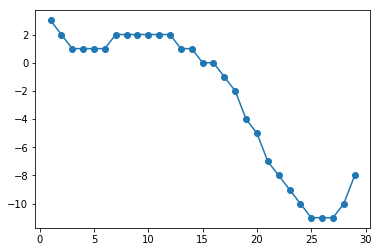

-5
-11.0


In [63]:
from scipy import math, optimize 
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

def h(x):
    return int(f(x))

%matplotlib inline

x = np.arange(1, 30, 1)
y =[h(p) for p in x]
plt.scatter(x, y)
plt.plot(x, y)
plt.show()

result = scipy.optimize.minimize (h, 30, method = 'BFGS')
print(result.fun)
result1 = scipy.optimize.differential_evolution(h, [(1,30)])
print(result1.fun)

string = '-5 -11.0'


file_obj = open('file3.txt', 'w')
file_obj.write(string)
file_obj.close()